<h2>Лабораторная работа №3 по курсу "Проектирование интеллектуальных систем"</h2>

<p><b>Выполнил:</b> Саврасов П.А. группа ИУ5-24М</p>

<h3>Задание</h3>
    <p>Обучить нейронную сеть на наборе данных CIFAR10. Точность модели должна достигать 70%. Сеть
должна состоять из трех сверточных слоев и полносвязной сети.</p>

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.datasets import cifar10

import seaborn as sns

In [75]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Формат датасета имеет следующий формат:<br>
50000 образцов 32 на 32 пикселя, каждый пиксель зашифорван RGB кодом<br>
Для применения его как обучающей выборки необходимо сначала отмасштабировать данные

In [76]:
xTrain = xTrain.astype('float32') / 255
xTest = xTest.astype('float32') / 255

Создадим нейросеть со следующей архитектурой:
<ul>
    <li>Входной слой: 32 x 32 x 3</li>
    <li>Свёрточный слой 1</li>
    <li>Свёрточный слой 2</li>
    <li>Свёрточный слой 3</li>
    <li>Полносвязный слой: 10</li>
</ul>

In [102]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(32, 32, 3)),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10)
    ]
)

In [103]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [104]:
history = model.fit(xTrain, yTrain, batch_size=128, epochs=10, verbose=1)
model.evaluate(xTest, yTest, batch_size=128, verbose=2)

Epoch 1/10
391/391 [==============================] - 13s 33ms/step - loss: 1.8170 - accuracy: 0.3307
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 1.2392 - accuracy: 0.5580
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 1.0465 - accuracy: 0.6343
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.9405 - accuracy: 0.6710
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 0.8349 - accuracy: 0.7091
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 0.7593 - accuracy: 0.7328
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 0.7015 - accuracy: 0.7556
Epoch 8/10
391/391 [==============================] - 13s 33ms/step - loss: 0.6494 - accuracy: 0.7735
Epoch 9/10
391/391 [==============================] - 13s 34ms/step - loss: 0.5823 - accuracy: 0.7955
Epoch 10/10
391/391 [==============================] - 13s 34ms/step - loss: 0.528

[0.811121940612793, 0.730400025844574]

<AxesSubplot:xlabel='Epoch', ylabel='Accuracy'>

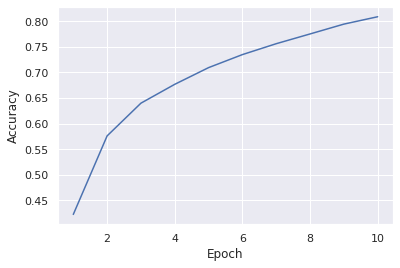

In [105]:
historyData = {}
historyData['Accuracy'] = history.history['accuracy']
historyData['Epoch'] = list(range(1, history.params['epochs'] + 1))
sns.lineplot(x="Epoch", y="Accuracy",
             data=historyData)

<h3>Контрольные вопросы</h3>
<ol>
    <li>
        <h4>Что такое свертка?</h4>
        <p>Вы можете представить себе свёртку как «смешивание» информации. Представьте два ведра, наполненных какой-либо информацией, которые выливаются в один большой контейнер и затем перемешиваются определённым способом. Каждое ведро с информацией имеет своё собственное правило, которое описывает, как информация из одного ведра смешивается с другим. Свёртка — это упорядоченная процедура смешивания двух источников информации. Свёртку можно описать математически. Это такая же операция, как сложение, умножение или взятие производной. Хотя сама по себе операция свёртки сложна, она может быть очень полезна для упрощения ещё более сложных выражений.</p>
    </li>
    <li>
        <h4>Напишите математическую операцию свертки</h4>
        <p>Свёртка функций — операция в функциональном анализе, которая при применении к двум функциям f и g, возвращает третью функцию, соответствующую взаимнокорреляционной функции f(x) и g(-x). Операцию свертки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой. Понятие свёртки обобщается для функций, определённых на произвольных измеримых пространствах и может рассматриваться как особый вид интегрального преобразования. В дискретном случае свёртка соответствует сумме значений f с коэффициентами, соответствующими смещённым значениям g, то есть (f*g)(x) = f(1)g(x-1) + f(2)g(x-2) + f(3)g(x-3) + ... </p>
    </li>
    <li>
        <h4>Какие свойства сверточного слоя?</h4>
        <p>В сверточных слоях каждый элемент связан с определенным количеством элементов в предыдущем слое. Обычно количество элементов варьируется от 1 до 9 элементов. При этом, значения весов между нейронами разделяются, т.е. значения весов i-го нейрона равны значениям весов i + 1 нейрона. Данное свойство значительно уменьшает требования к объему памяти.</p>
    </li>
    <li>
        <h4>Сколько этапов в сверточном слое? Какие?</h4>
        <p>Три этапа: (Применение фильтра, Применение нелинейности, Применение операции дискретитизации (pooling).</p>
    </li>
    <li>
        <h4>Что такое регуляризация? Зачем она нужна?</h4>
        <p>Регуляризация это — метод добавления некоторых дополнительных ограничений к условию с целью решить неправильно поставленную задачу. В машинном обучении и статистике регуляризация в основном используется для обозначения ограничения оптимизации путем наложения штрафа на сложность решения в попытке предотвратить переобучение на обучающей выборке. Регуляризация чаще всего применяется путем добавления неявной информации о желаемом результате.</p>
    </li>
    <li>
        <h4>Какой вид регуляризации использовался в лабораторной?</h4>
        <p>Dropout. - отключает один из нейронов в слое.Добавить слой dropout в TensorFlow можно с помощью команды: tf.keras.layers.Dropout(rate), где rate - вероятность работы нейрона в слое.</p>
    </li>   
</ol>